In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
import curvedsky as cs
import binning
sys.path.append('../')

In [2]:
from utils import cli,ini_full
from tqdm import tqdm

In [3]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering
from quest import Reconstruction

In [4]:
sim = SimExperimentFG.from_ini('LB_FG2.ini')

DATABASE INFO: File - /global/u2/l/lonappan/workspace/LBlens/Data/surveys.pkl
SIMULATION INFO: CMB Realisation - /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
SIMULATION INFO: Foreground - /global/cscratch1/sd/lonappan/S4BIRD/FG
SIMULATION INFO: Foreground Model - s1d1
SIMULATION INFO: Foreground included - True
SIMULATION INFO: Number of simulations - 500
SIMULATION INFO: Frequency range - 0.0 GHz - 500.0 GHz
SIMULATION INFO: NSIDE - 512
SIMULATION INFO: Output folder - /global/cscratch1/sd/lonappan/S4BIRD/DELL_noisefix/s1d1


In [60]:
binner = binning.multipole_binning(200,lmin=2,lmax=sim.lmax)
B = binner.bc
def bin_cell(arr):
    """
    binning function for the multipole bins
    """
    return binning.binning(arr,binner)

In [6]:
nt,ne,nb = sim.noise_spectra(500)
ft,fe,fb = sim.fg_res_mean(500)

In [7]:
l = np.arange(sim.lmax+1)
dl = l*(l+1)/(2*np.pi)

In [61]:
t,e,b = [],[],[]
for i in tqdm(range(10),desc='spectra', unit='sim'):
    alms = sim.get_cleaned_cmb(i)
    t.append(bin_cell((hp.alm2cl(alms[0])-(nt+ft)*sim.Tcmb**2) *dl ))
    e.append(bin_cell((hp.alm2cl(alms[1])-(ne+fe)*sim.Tcmb**2) *dl ))
    b.append(bin_cell((hp.alm2cl(alms[2])-(nb+fb)*sim.Tcmb**2) *dl ))
t = np.array(t)
e = np.array(e)
b = np.array(b)

spectra: 100%|██████████| 10/10 [00:03<00:00,  2.86sim/s]


Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell/2\\pi$ [$\\mu$K$^2$]')

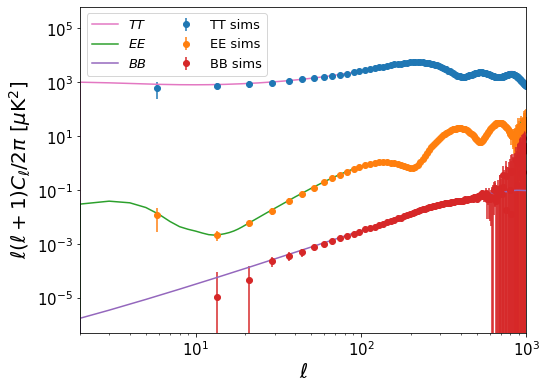

In [69]:
plt.figure(figsize=(8,6))
plt.errorbar(B,t.mean(axis=0),yerr=t.std(axis=0)*3,label='TT sims',fmt='o')
plt.loglog((sim.cl_len[0,:])*sim.Tcmb**2 *dl,label='$TT$',c='C6')
plt.errorbar(B,e.mean(axis=0),yerr=e.std(axis=0)*3,label='EE sims',fmt='o')
plt.loglog((sim.cl_len[1,:])*sim.Tcmb**2*dl,label='$EE$')
plt.errorbar(B,b.mean(axis=0),yerr=b.std(axis=0),label='BB sims',fmt='o')
plt.loglog((sim.cl_len[2,:])*sim.Tcmb**2*dl,label='$BB$')
plt.legend(ncol=2,fontsize=13)
plt.xlim(2,1000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$\ell$',fontsize=20)
plt.ylabel('$\ell(\ell+1)C_\ell/2\pi$ [$\mu$K$^2$]',fontsize=20)

In [94]:
t,e,b = [],[],[]
for i in tqdm(range(500),desc='spectra', unit='sim'):
    alms = sim.get_cleaned_cmb(i)
    t.append(bin_cell(hp.alm2cl(alms[0])*dl))
    e.append(bin_cell(hp.alm2cl(alms[1])*dl))
    b.append(bin_cell(hp.alm2cl(alms[2])*dl))
t = np.array(t)
e = np.array(e)
b = np.array(b)

spectra: 100%|██████████| 500/500 [04:38<00:00,  1.80sim/s]


Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell/2\\pi$ [$\\mu$K$^2$]')

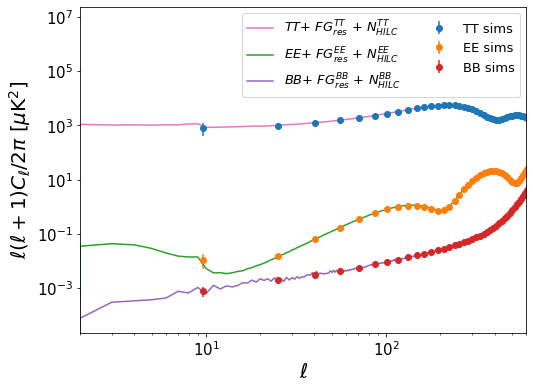

In [105]:
plt.figure(figsize=(8,6))
plt.errorbar(B,t.mean(axis=0),yerr=t.std(axis=0)*5,label='TT sims',fmt='o')
plt.loglog((sim.cl_len[0,:]+nt+ft)*sim.Tcmb**2 *dl,label='$TT$+ $FG_{res}^{TT}$ + $N_{HILC}^{TT}$',c='C6')
plt.errorbar(B,e.mean(axis=0),yerr=e.std(axis=0)*3,label='EE sims',fmt='o')
plt.loglog((sim.cl_len[1,:]+ne+fe)*sim.Tcmb**2*dl,label='$EE$+ $FG_{res}^{EE}$ + $N_{HILC}^{EE}$')
plt.errorbar(B,b.mean(axis=0),yerr=b.std(axis=0)*6,label='BB sims',fmt='o')
plt.loglog((sim.cl_len[2,:]+nb+fb)*sim.Tcmb**2*dl,label='$BB$+ $FG_{res}^{BB}$ + $N_{HILC}^{BB}$')
plt.legend(ncol=2,fontsize=13)
plt.xlim(2,600)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$\ell$',fontsize=20)
plt.ylabel('$\ell(\ell+1)C_\ell/2\pi$ [$\mu$K$^2$]',fontsize=20)